In [2]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: gpg 1.14.0-unknown has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
import requests

url = "http://www.ebi.ac.uk/Tools/webservices/psicquic/intact/webservices/current/search/query/17446270"


httpResp = requests.get(url)

ans = httpResp.text

In [12]:
print(ans)

uniprotkb:P0CW72	uniprotkb:P0CW72	intact:EBI-2620133|uniprotkb:Q777A5	intact:EBI-2620133|uniprotkb:Q777A5	psi-mi:barf1_ebvg(display_long)|uniprotkb:BARF1(gene name)|psi-mi:BARF1(display_short)|uniprotkb:33 kDa early protein(gene name synonym)|uniprotkb:p33(gene name synonym)	psi-mi:barf1_ebvg(display_long)|uniprotkb:BARF1(gene name)|psi-mi:BARF1(display_short)|uniprotkb:33 kDa early protein(gene name synonym)|uniprotkb:p33(gene name synonym)	psi-mi:"MI:0397"(two hybrid array)	Calderwood et al. (2007)	pubmed:17446270|imex:IM-20435|mint:MINT-6769080	taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")	taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")	psi-mi:"MI:0915"(physical association)	psi-mi:"MI:0469"(IntAct)	intact:EBI-2620961|imex:IM-20435-3	author score:+|intact-miscore:0.51
uniprotkb:P14348	uniprotkb:P0C704	intact:EBI-2620158|intact:EBI-9645437|uniprotkb:Q777G5	intact:EBI-2620975|uniprotkb:Q3KSQ5	psi-mi:scp_ebvb9(display_long)|uniprotkb:SCP(gene nam

In [15]:
import re

def mitabReader(httpText):
    for line in ans.split("\n"):
        _ = line.split("\t")
        if len(_) > 1 and _[0].startswith("uniprotkb:")\
                      and _[1].startswith("uniprotkb:"):
            yield [ _[0].replace("uniprotkb:", ""),\
                    _[1].replace("uniprotkb:", "") ]\
                  + _[2:]
                
            
def isMitab_EBV_EBV(mitabLine):
    reEBV   = "taxid:(1037[6-7]|82830)"
    if re.search(reEBV, mitabLine[9]) and re.search(reEBV, mitabLine[10]):
        return True
    return False

def isMitab_Human_EBV(mitabLine):
    reSapiens   = "taxid:9606"
    if re.search(reSapiens, mitabLine[9]) or re.search(reSapiens, mitabLine[10]):
        return True
    return False



In [17]:
EBV_EBV_mitab   = []
EBV_Human_mitab = []
total = 0
for mitabArray in mitabReader(ans):
    total += 1
    if isMitab_EBV_EBV(mitabArray):
        EBV_EBV_mitab.append(mitabArray)
    elif isMitab_Human_EBV(mitabArray):
        EBV_Human_mitab.append(mitabArray)
    else : 
        raise ValueError("Je ne connais pas cette espece ==> ", mitabArray[9:11])

print(f"Nombre total d'interactions {total}, EBV-EBV {len(EBV_EBV_mitab)}, EBV-humain {len(EBV_Human_mitab)}")

Nombre total d'interactions 230, EBV-EBV 59, EBV-humain 171


In [32]:
EBV_protein = set()
for mitab in EBV_EBV_mitab :
    EBV_protein.add(mitab[0])
    EBV_protein.add(mitab[1])
print(f"Nb EBV proteins in EBV-EBV data set is {len(EBV_protein)}")

Nb EBV proteins in EBV-EBV data set is 48


In [34]:
human_protein = set()
for mitab in EBV_Human_mitab :
    reSapiens   = "taxid:9606"
    if re.search(reSapiens, mitab[9]):
        human_protein.add(mitab[0])
        EBV_protein.add(mitab[1])
    else:
        human_protein.add(mitab[1])
        EBV_protein.add(mitab[0])
print(f"Nb human proteins in EBV-human data set is {len(human_protein)}")
print(f"Nb EBV proteins in EBV-EBV and EBV-human data set is {len(EBV_protein)}")

Nb human proteins in EBV-human data set is 113
Nb EBV proteins in EBV-EBV data set is 64


In [55]:
human_protein

{'A1KXE4',
 'A1L0V1',
 'A4D0U5',
 'B2RCM5',
 'B3KR20',
 'B3KS36',
 'O15162',
 'O43707',
 'O43866',
 'O75094',
 'O76013',
 'O94813',
 'O95219',
 'O95236',
 'O95681',
 'O95967',
 'P01857',
 'P01889',
 'P02751',
 'P04233',
 'P04275',
 'P04406',
 'P04439',
 'P08670',
 'P09455',
 'P12814',
 'P14618',
 'P15529',
 'P15814',
 'P18545',
 'P19838',
 'P20700',
 'P22736',
 'P25788',
 'P28676',
 'P28799',
 'P30626',
 'P36578',
 'P46379',
 'P49759',
 'P49908',
 'P52292',
 'P53634',
 'P55268',
 'P61289',
 'P62136',
 'P62995',
 'P63010',
 'P63167',
 'P63279',
 'P68871',
 'P80303',
 'Q02818',
 'Q07021',
 'Q08380',
 'Q12805',
 'Q12933',
 'Q13077',
 'Q13164',
 'Q13185',
 'Q13576',
 'Q15326',
 'Q15691',
 'Q15723',
 'Q15942',
 'Q16206',
 'Q16891',
 'Q49A88',
 'Q5JY77',
 'Q5SRE7',
 'Q5T124',
 'Q68DS7',
 'Q6FH22',
 'Q6PKC3',
 'Q71U36',
 'Q86V58',
 'Q86WN1',
 'Q86X95',
 'Q8N2S1',
 'Q8TAS6',
 'Q8TD31',
 'Q8TF72',
 'Q8WV28',
 'Q8WXE0',
 'Q8WY48',
 'Q93062',
 'Q96BY9',
 'Q96CV9',
 'Q96D09',
 'Q96EP0',
 'Q96IR5',

In [77]:
import networkx as nx
G = nx.Graph()

In [78]:
for mitab in EBV_Human_mitab:
    G.add_edge(mitab[0],mitab[1])

In [79]:
node_colors = []
for node in G.nodes():
    if node in human_protein:
        node_colors.append('pink')
    elif node in EBV_protein:
        node_colors.append('orange')

In [80]:
import matplotlib.pyplot as plt

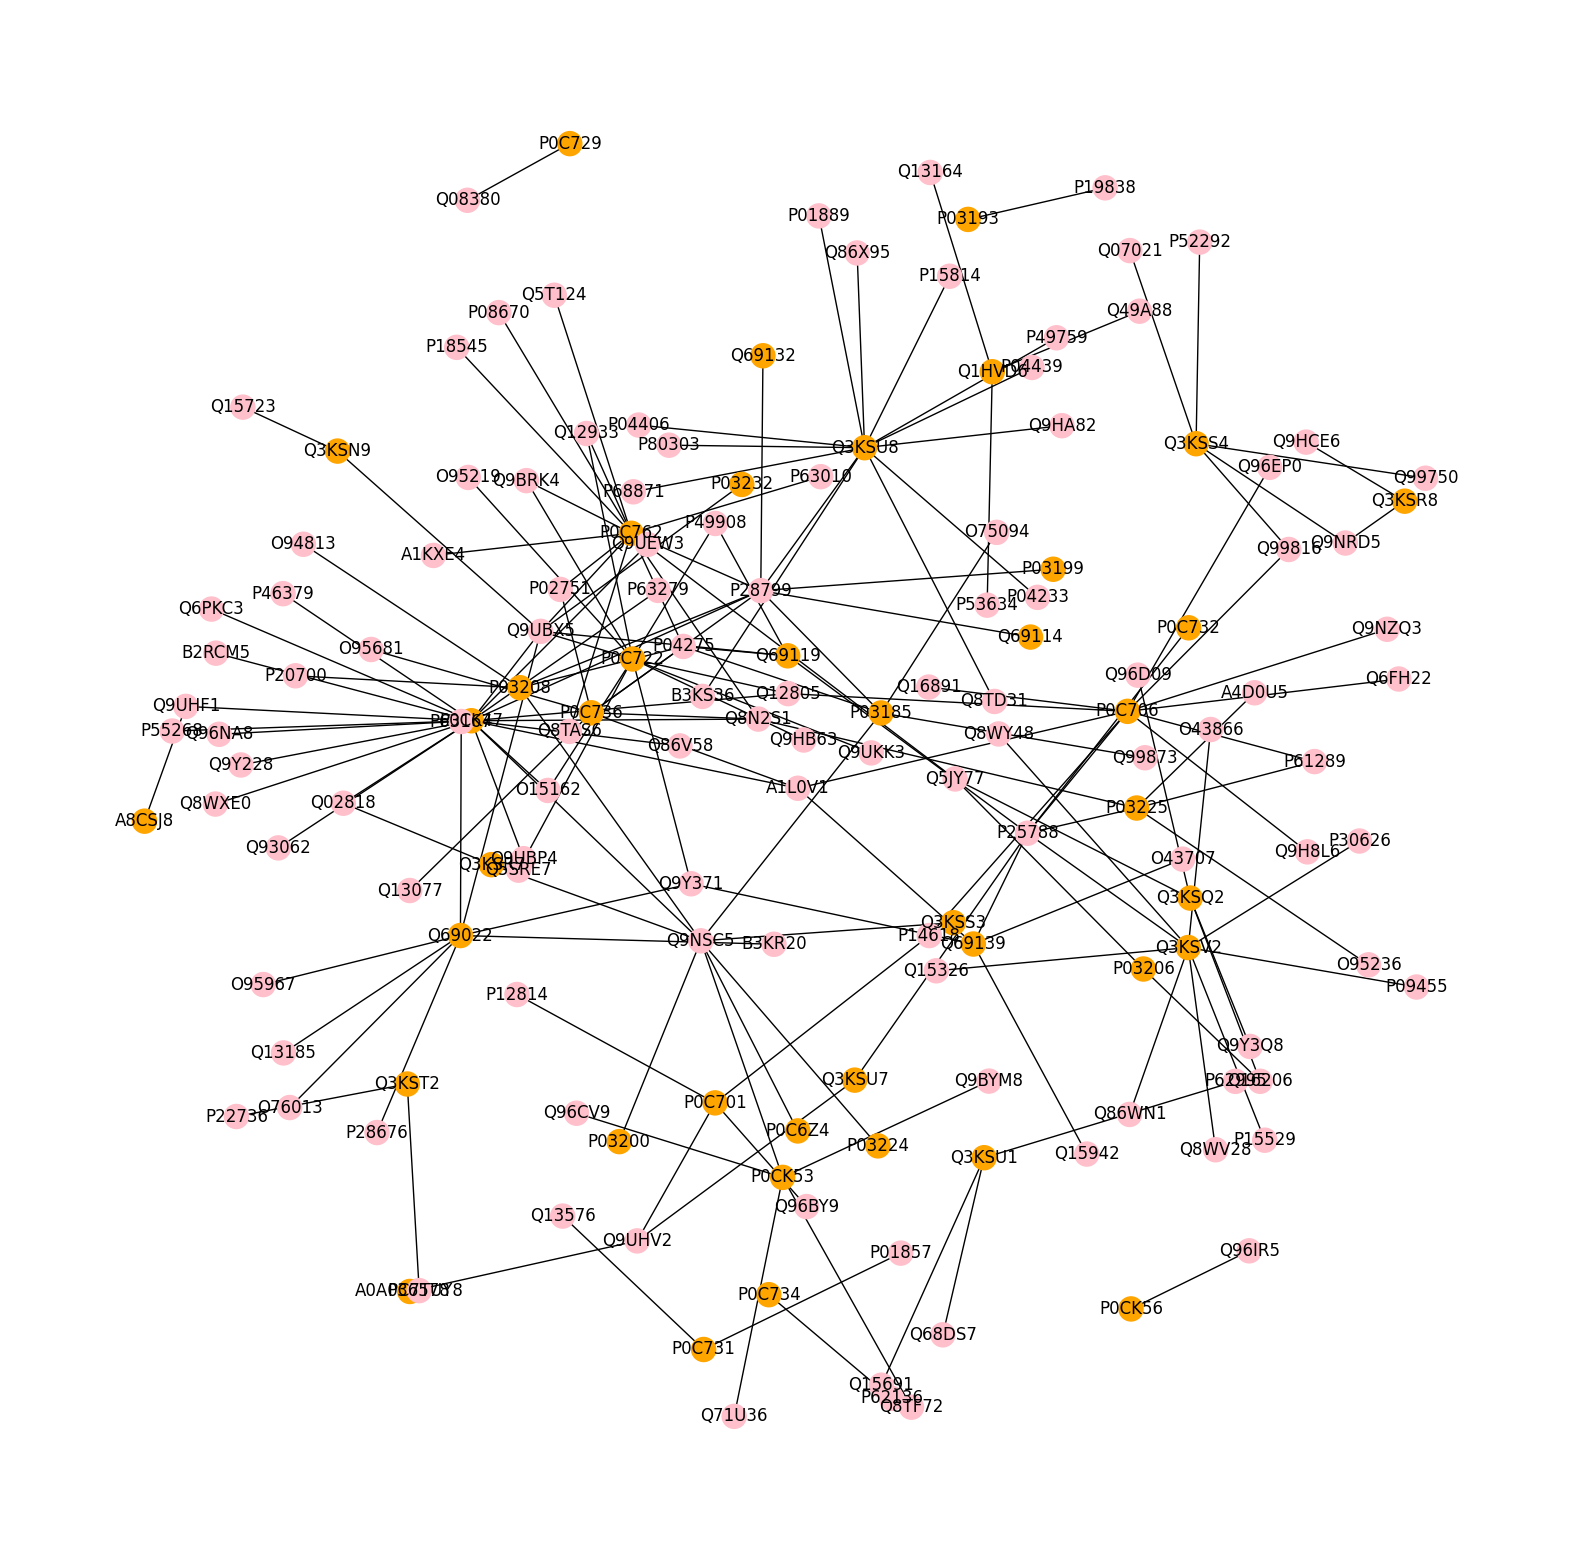

In [81]:
fig, host_ax = plt.subplots(figsize=(20,20))
host_ax.set_axis_off()

node_pos_dict = nx.spring_layout(G, k=0.3)

nx.draw(G, node_color=node_colors, with_labels=True, ax= host_ax, pos = node_pos_dict)
